# Monte Carlo

This notebook presents the monte carlo process used in the paper, and may be used to replicate the monte carlo results in Figures 7 and 8.

---

In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import fitlib
import vector

In [2]:
%load_ext autoreload
%autoreload 2

The following is a nominal error distribution associated with LHCb data recorded in late July. We simulate data by applying a Gaussian resolution with a random value from the MERR distribution on a true mass value.

In [3]:
f = uproot.open("./data/MERR.root")

In [4]:
Dp_DTF_MERR = f['DecayTree']["Dp_DTF_MERR"].array()

In [5]:
mu = 1970.
sigma = np.random.choice(Dp_DTF_MERR, 100000)
observed = np.multiply(sigma,np.random.randn(100000)) + mu

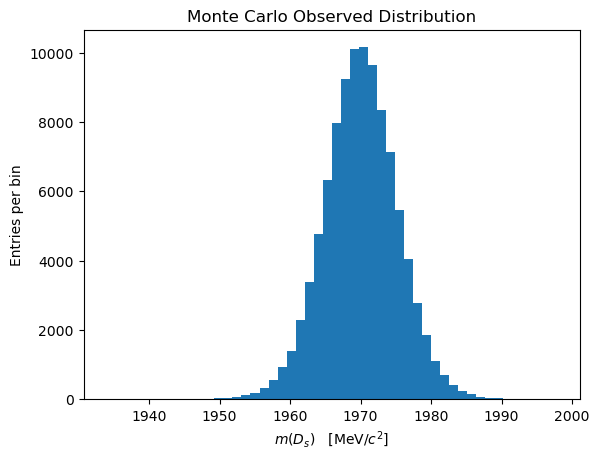

In [6]:
plt.hist(observed,bins=50)
plt.title('Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

The next cells show fits of this observed distribution. It is not described well by a single-Gaussian resolution. Using a double-Gaussian radically improves the fit, and a triple-Gaussian's improvement is marginal. 

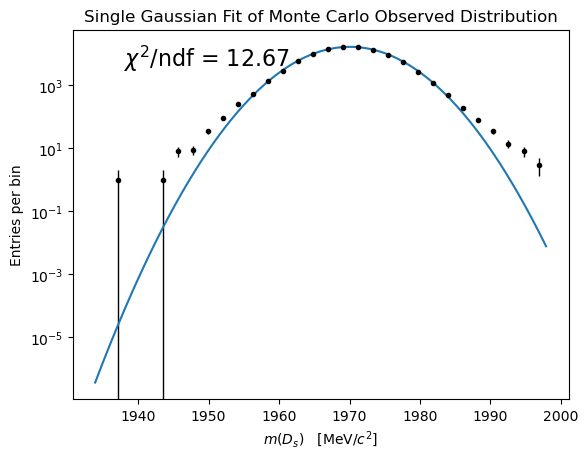

In [12]:
gauss = fitlib.Fitter.binned(observed, 30)
gauss.pdf = [fitlib.Normal(mu=(1950,2000),sigma=(2,np.inf))]
gauss.chi2()
gauss.plot_data()
gauss.plot_fit()
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {gauss.minimizer.fval/(len(gauss.x)-len(gauss.fit_params)-1):.02f}', fontsize=16)
plt.title('Single Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

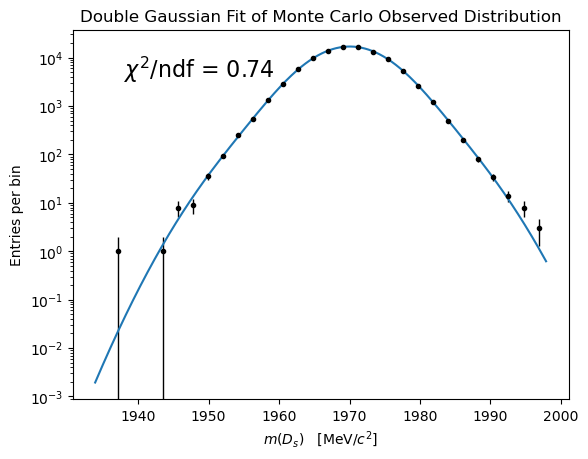

In [13]:
gauss2 = fitlib.Fitter.binned(observed, 30)
gauss2.mu = fitlib.f(1950,2000)
gauss2.pdf = [fitlib.Normal(mu=(gauss2.mu)),fitlib.Normal(mu=(gauss2.mu))]
gauss2.chi2()
gauss2.plot_data()
gauss2.plot_fit()
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {gauss2.minimizer.fval/(len(gauss2.x)-len(gauss2.fit_params)-1):.02f}', fontsize=16)
plt.title('Double Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

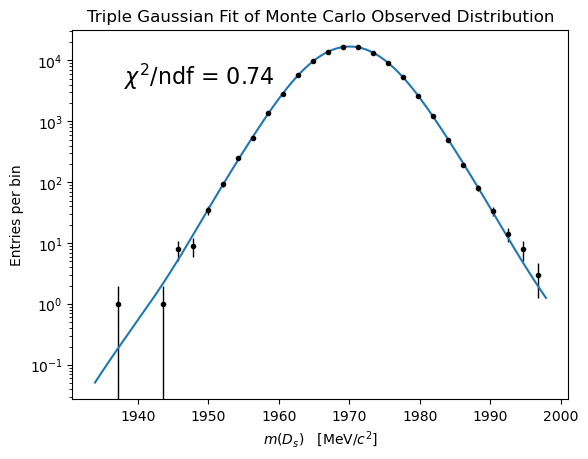

In [14]:
gauss3 = fitlib.Fitter.binned(observed, 30)
gauss3.mu = fitlib.f(1950,2000)
gauss3.pdf = [fitlib.Normal(mu=(gauss3.mu)),fitlib.Normal(mu=(gauss3.mu)),fitlib.Normal(mu=(gauss3.mu))]
gauss3.chi2()
gauss3.plot_data()
gauss3.plot_fit()
plt.yscale('log')
plt.text(1938, 4*10**3, f'$\chi^2$/ndf = {gauss3.minimizer.fval/(len(gauss3.x)-len(gauss3.fit_params)-1):.02f}', fontsize=16)
plt.title('Triple Gaussian Fit of Monte Carlo Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(D_s)$   [MeV/$c^2$]')
plt.show()

## PHOTOS Data

PHOTOS is used to generate theoretical mass distributions accounting for photon radiation. A 500,000 entry subset of the 10,000,000 entry simulation is used for the sample function, and a pregenerated histogram of all data is used for fitting

In [16]:
Dp_tree=uproot.open("./data/Dp_subset.root")["t"]

Dp_ssK_TRUEP_E = np.asarray(Dp_tree["ssK_TRUEP_E"])
Dp_ssK_TRUEP_X = np.asarray(Dp_tree["ssK_TRUEP_X"])
Dp_ssK_TRUEP_Y = np.asarray(Dp_tree["ssK_TRUEP_Y"])
Dp_ssK_TRUEP_Z = np.asarray(Dp_tree["ssK_TRUEP_Z"])

Dp_osK_TRUEP_E = np.asarray(Dp_tree["osK_TRUEP_E"])
Dp_osK_TRUEP_X = np.asarray(Dp_tree["osK_TRUEP_X"])
Dp_osK_TRUEP_Y = np.asarray(Dp_tree["osK_TRUEP_Y"])
Dp_osK_TRUEP_Z = np.asarray(Dp_tree["osK_TRUEP_Z"])

Dp_sspi_TRUEP_E = np.asarray(Dp_tree["sspi_TRUEP_E"])
Dp_sspi_TRUEP_X = np.asarray(Dp_tree["sspi_TRUEP_X"])
Dp_sspi_TRUEP_Y = np.asarray(Dp_tree["sspi_TRUEP_Y"])
Dp_sspi_TRUEP_Z = np.asarray(Dp_tree["sspi_TRUEP_Z"])

Dp_ssK_vec   = vector.array({"px": Dp_ssK_TRUEP_X, "py":Dp_ssK_TRUEP_Y, "pz":Dp_ssK_TRUEP_Z, "E":Dp_ssK_TRUEP_E})
Dp_osK_vec   = vector.array({"px": Dp_osK_TRUEP_X, "py":Dp_osK_TRUEP_Y, "pz":Dp_osK_TRUEP_Z, "E":Dp_osK_TRUEP_E})
Dp_sspi_vec  = vector.array({"px": Dp_sspi_TRUEP_X, "py":Dp_sspi_TRUEP_Y, "pz":Dp_sspi_TRUEP_Z, "E":Dp_sspi_TRUEP_E})

Dp_mother_vec = Dp_ssK_vec + Dp_osK_vec + Dp_sspi_vec
Dp_mother_mass = Dp_mother_vec.mass

In [17]:
Ds_tree=uproot.open("./data/Ds_subset.root")["t"]

Ds_ssK_TRUEP_E = np.asarray(Ds_tree["ssK_TRUEP_E"])
Ds_ssK_TRUEP_X = np.asarray(Ds_tree["ssK_TRUEP_X"])
Ds_ssK_TRUEP_Y = np.asarray(Ds_tree["ssK_TRUEP_Y"])
Ds_ssK_TRUEP_Z = np.asarray(Ds_tree["ssK_TRUEP_Z"])

Ds_osK_TRUEP_E = np.asarray(Ds_tree["osK_TRUEP_E"])
Ds_osK_TRUEP_X = np.asarray(Ds_tree["osK_TRUEP_X"])
Ds_osK_TRUEP_Y = np.asarray(Ds_tree["osK_TRUEP_Y"])
Ds_osK_TRUEP_Z = np.asarray(Ds_tree["osK_TRUEP_Z"])

Ds_sspi_TRUEP_E = np.asarray(Ds_tree["sspi_TRUEP_E"])
Ds_sspi_TRUEP_X = np.asarray(Ds_tree["sspi_TRUEP_X"])
Ds_sspi_TRUEP_Y = np.asarray(Ds_tree["sspi_TRUEP_Y"])
Ds_sspi_TRUEP_Z = np.asarray(Ds_tree["sspi_TRUEP_Z"])

Ds_ssK_vec   = vector.array({"px": Ds_ssK_TRUEP_X, "py":Ds_ssK_TRUEP_Y, "pz":Ds_ssK_TRUEP_Z, "E":Ds_ssK_TRUEP_E})
Ds_osK_vec   = vector.array({"px": Ds_osK_TRUEP_X, "py":Ds_osK_TRUEP_Y, "pz":Ds_osK_TRUEP_Z, "E":Ds_osK_TRUEP_E})
Ds_sspi_vec  = vector.array({"px": Ds_sspi_TRUEP_X, "py":Ds_sspi_TRUEP_Y, "pz":Ds_sspi_TRUEP_Z, "E":Ds_sspi_TRUEP_E})

Ds_mother_vec = Ds_ssK_vec + Ds_osK_vec + Ds_sspi_vec
Ds_mother_mass = Ds_mother_vec.mass

## Monte Carlo data for $D \rightarrow K K \pi$ decay channel

With this data, we can create a sampling function to generate data

In [18]:
def sample():
    raw_data_dp = np.random.choice(Dp_mother_mass, size=800000) + np.multiply(np.random.choice(Dp_DTF_MERR,800000),np.random.randn(800000)) 
    raw_data_ds = np.random.choice(Ds_mother_mass, size=1000000) + np.multiply(np.random.choice(Dp_DTF_MERR,1000000),np.random.randn(1000000))
    background = np.random.exponential(150, 60000)+1840
    return np.concatenate([raw_data_dp,raw_data_ds,background])

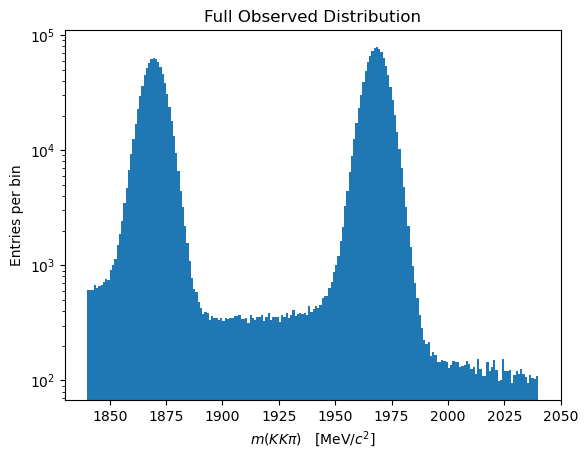

In [19]:
observed_full = sample()
plt.hist(observed_full,bins=200,range=(1840,2040))
plt.yscale('log')
plt.title('Full Observed Distribution')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

## Crystal ball fit

Now we fit this distribution, using a Crystal ball and a Gaussian to model each peak

In [20]:
from scipy.stats import crystalball

In [21]:
def CrystalBall(n,alpha,beta,mu,sigma):
    return fitlib.Fit_function(lambda x,n,a,b,m,s: n*crystalball.pdf(x,a,b,loc=m,scale=s),
                              [n,alpha,beta,mu,sigma])

In [22]:
crystal = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
crystal.mu1 = fitlib.f(1850,1900)
crystal.mu_diff = fitlib.f(0,200)
crystal.pdf = [
    fitlib.Normal(mu=crystal.mu1), CrystalBall(alpha=(0.5,10), beta=(1,3,30), n=(0,10000,np.inf), mu=crystal.mu1, sigma=(1,40)),
    fitlib.Normal(mu=crystal.mu1+crystal.mu_diff), CrystalBall(alpha=(0.5,10), beta=(1,3,30), n=(0,10000,np.inf), mu=crystal.mu1+crystal.mu_diff, sigma=(1,40)),
    fitlib.Exp(x0=1840)
]
crystal.chi2(100000) # argument is call limit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 451                        │             Nfcn = 9869              │
│ EDM = 1.84e-05 (Goal: 0.0002)    │            time = 7.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.265e6  │  0.030e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869580e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   4.06    │   0.08    │            │            │    0    │         │       │
│ 3 │ x3   │  0.521e6  │  0.030e6  │            │            │    0    │         │       │
│ 4 │ x4   │   1.992   │   0.029   │            │            │   0.5   │   10    │       │
│ 5 │ x5   │    30     │    21     │            │            │    1    │   30    │       │
│ 6 │ x6   │   5.63    │   0.06    │            │            │    1    │   40    │       │
│ 7 │ x7   │  0.515e6  │  0.026e6  │            │            │    1    │         │       │
│ 8 │ x8   │  98.665   │   0.008   │            │            │    0    │   200   │       │
│ 9 │ x9   │   4.32    │   0.04    │            │            │    0    │         │       │
│ 10│ x10  │  0.476e6  │  0.026e6  │            │            │    0    │         │       │
│ 11│ x11  │   2.278   │   0.029   │            │            │   0.5   │   10    │       │
│ 12│ x12  │   1.96    │   0.11    │            │            │    1    │   30    │       │
│ 13│ x13  │   6.05    │   0.05    │            │            │    1    │   40    │       │
│ 14│ x14  │  67.7e3   │   0.7e3   │            │            │    0    │         │       │
│ 15│ x15  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 16│ x16  │   114.8   │    1.6    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12          x13          x14          x15          x16 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     8.98e+08    -18.49677   2.371149e3       -0.9e9    -450.1765      19.7136  1.6350052e3        0.1e9     14.74340      79.9805       -0.1e9      45.4918     -498.510     140.3090       -4.2e6            0    11.9431e3 │
│  x1 │    -18.49677     3.88e-05     -0.04e-3     18.51236     -0.03e-3     -0.01e-3     -0.05e-3      4.82409     -0.04e-3      0.01e-3     -4.85819     -0.01e-3      0.01e-3      0.01e-3     40.50e-3            0      0.01e-3 │
│  x2 │   2.371149e3  

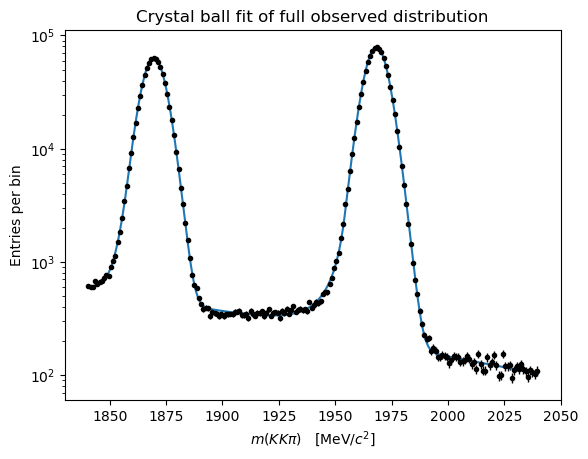

In [23]:
crystal.plot_data()
crystal.plot_fit()
plt.title('Crystal ball fit of full observed distribution')
plt.yscale('log')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

## Convolution fit

Now we fit it with the convolutional method. Recall that the double Gaussian resolution is a good descriptor of nominal errors. Because of that, we fit each peak with two convolutions at the same mu

In [35]:
tanh_dp = fitlib.Convolution([0], 1869.65, 1)
Dp_data = np.loadtxt("./data/Dp_histogram.csv", delimiter=",", skiprows=1)
tanh_dp.d_x = Dp_data[:, 0]
tanh_dp.c = Dp_data[:, 1]

In [36]:
tanh_ds = fitlib.Convolution([0], 1968.33, 1)
Ds_data = np.loadtxt("./data/Ds_histogram.csv", delimiter=",", skiprows=1)
tanh_ds.d_x = Ds_data[:, 0]
tanh_ds.c = Ds_data[:, 1]

In [37]:
import numba

In [38]:
conv = fitlib.Fitter.binned(observed_full,200, range=(1840,2040))
conv.mu1 = fitlib.f(1850,1900)
conv.mu_diff = fitlib.f(0,200)
conv.pdf = [
    tanh_dp.pdf(mu=conv.mu1),tanh_dp.pdf(mu=conv.mu1),
    tanh_ds.pdf(mu=conv.mu1 + conv.mu_diff),tanh_ds.pdf(mu=conv.mu1 + conv.mu_diff),
    fitlib.Exp(x0=1840)
]
conv.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 235.6                      │             Nfcn = 2064              │
│ EDM = 2.04e-05 (Goal: 0.0002)    │           time = 32.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.310e6  │  0.034e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869650e3 │0.000006e3 │            │            │  1850   │  1900   │       │
│ 2 │ x2   │   6.12    │   0.10    │            │            │    0    │         │       │
│ 3 │ x3   │  0.482e6  │  0.034e6  │            │            │    1    │         │       │
│ 4 │ x4   │   4.43    │   0.06    │            │            │    0    │         │       │
│ 5 │ x5   │  0.676e6  │  0.028e6  │            │            │    1    │         │       │
│ 6 │ x6   │  98.673   │   0.008   │            │            │    0    │   200   │       │
│ 7 │ x7   │   4.52    │   0.04    │            │            │    0    │         │       │
│ 8 │ x8   │  0.321e6  │  0.028e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.34    │   0.09    │            │            │    0    │         │       │
│ 10│ x10  │  60.8e3   │   0.6e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   150.5   │    2.9    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12 │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     1.13e+09      3.10847  -3.431992e3       -1.1e9 -1.8924589e3           -0     -1.99070     -16.9413            0      -53.075        0.3e6            0    -26.567e3 │
│  x1 │      3.10847     3.62e-05     -0.01e-3     -3.16992           -0    290.38e-3     -0.04e-3            0   -297.70e-3            0    -64.23e-3            0     -0.82e-3 │
│  x2 │  -3.431992e3     -0.01e-3       0.0108   3.444683e3       0.0056       52.442      0.01e-3       0.0001      -50.649        0.000       -1.116        0.000        0.096 │
│  x3 │       -1.1e9     -3.16992   3.444683e3     1.13e+09  1.8978055e3            0      2.03258      17.1868           -0       53.850       -0.3e6            0     27.035e3 │
│  x4 │ -1.8924589e3           -0       0.0056  1.8978055e3      0.00329      22.2877            0       0.0000     -21.5336       0.0001      -0.4973       0.0000       0.0404 │
│  x5 │           -0    290.38e-3       52.442            0      22.2877     8.01e+08   -164.82e-3  1.0658046

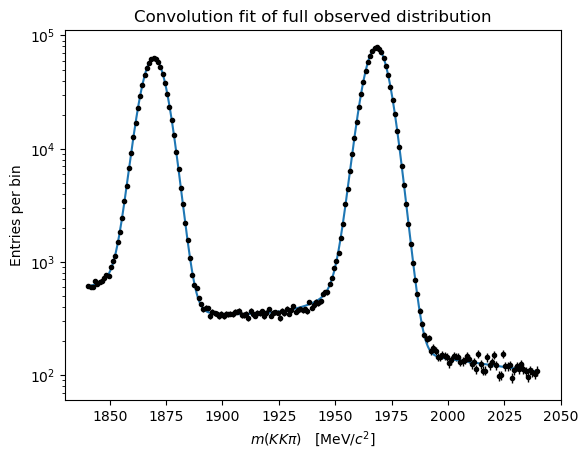

In [39]:
conv.plot_data()
conv.plot_fit()
plt.title('Convolution fit of full observed distribution')
plt.yscale('log')
plt.ylabel('Entries per bin')
plt.xlabel('$m(K K \pi)$   [MeV/$c^2$]')
plt.show()

In [40]:
prints = [['Model', 'chi^2/ndf', 'mu1 (MeV)', 'Error', 'mu_diff (MeV)','Error'], 
          ['Truth', 'n/a', 1869.65, 0, 98.68, 0],
          ['Crystal ball', f"{crystal.minimizer.fval/(len(crystal.x)-np.sum(~crystal.minimizer.fixed)-1):.2f}", f"{crystal.mu1.value:.2f}", f"{crystal.mu1.error:.4f}",f"{crystal.mu_diff.value:.2f}",f"{crystal.mu_diff.error:.4f}"],
          ['Convolution', f"{conv.minimizer.fval/(len(conv.x)-np.sum(~conv.minimizer.fixed)-1):.2f}", f"{conv.mu1.value:.2f}", f"{conv.mu1.error:.4f}",f"{conv.mu_diff.value:.2f}",f"{conv.mu_diff.error:.4f}"]]

[print("{0: <16}{1: <12}{2: <10}{3: <12}{4: <10}{5: <12}".format(*p)) for p in prints][0]

Model           chi^2/ndf   mu1 (MeV) Error       mu_diff (MeV)Error       
Truth           n/a         1869.65   0           98.68     0           
Crystal ball    2.46        1869.58   0.0062      98.67     0.0082      
Convolution     1.26        1869.65   0.0060      98.67     0.0080      


We repeat this process to find that the Crystal ball is biased and has a non-Gaussian sampling distribution for mu1 and mu_diff, while the convolution is unbiased with approximately normal sampling distribution

In [41]:
fitters_crys=[]

In [ ]:
for i in range(3000):
    montecarlo = sample()
    fitter = fitlib.Fitter(montecarlo, bins=200,range=(1840,2040))
    fitter.mu = f(1840,1900)
    fitter.diff = f(0,100,200)

    fitter.pdf=[
        CrystalBall(alpha=f(0.5,10), beta=f(1,3,30), n=f(0,10000,np.inf),mu=fitter.mu, sigma=f(1,40)),
        fitlib.Normal(n=f(0,10000,np.inf),mu=fitter.mu, sigma=f(1,40)),
        
        CrystalBall(alpha=f(0.5,10), beta=f(1,3,30), n=f(0,10000,np.inf),mu=fitter.mu + fitter.diff, sigma=f(1,40)),
        fitlib.Normal(n=f(0,10000,np.inf),mu=fitter.mu + fitter.diff, sigma=f(1,40)),
        
        Exp(n=f(0,10000,np.inf), x0=f(1840), a=f(0.0001,300))
    ]

    if fitter.chi2(1000000).valid:
        fitters_crys.append(fitter)

In [ ]:
fitters_conv=[]

In [ ]:
for i in range(3000):
    montecarlo = sample()
    fitter = fitlib.Fitter(montecarlo, bins=200,range=(1840,2040))
    fitter.mu = f(1840,1900)
    fitter.diff = f(0,100,200)

    fitter.pdf = [
        tanh_dp.pdf(mu=fitter.mu),tanh_dp.pdf(mu=fitter.mu),
        tanh_ds.pdf(mu=fitter.mu + fitter.diff),tanh_ds.pdf(mu=fitter.mu + fitter.diff),
        fitlib.Exp(x0=1840)
    ]

    if fitter.chi2(1000000).valid:
        fitters_conv.append(fitter)